<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Reducción de Dimensionalidad, Clustering con Kmeans, Visualización de Grupos y Método Elbow para determinar el K óptimo</h1> </div>

Desarrollado por: Ing. Remigio Hurtado Ortiz, PhD. Correo de contacto: remihuro@hotmail.com 

En esta práctica aprenderás a realizar reducción de dimensionalidad de un conjunto de datos sintético (datatoy), para ello a partir de cuatro métodos identificarás el impacto de la reducción en un problema de Clustering (con el algoritmo Kmeans). El conjunto de datos describe las preferencias de clientes por ítems (que pueden ser películas, música, libros, productos de tecnología, platos de comida, restaurantes, destinos turísticos, tours, objetos de aprendizaje, contactos de una red social, artículos científicos, artículos de blog, etc.). Además, aprenderás a visualizar grupos de elementos detectados con clustering en 2D y 3D, y finalmente aprenderás una forma simple de determinar el K óptimo (cantidad de grupos) en Kmeans. 

Para la visualización se utiliza los valores de los componentes principales cuando se aplica PCA con 2 y 3 componentes.
    
Esta práctica está estructurada de la siguiente manera:

- [Fundamentos de Análisis de Componentes Principales y Clustering](#Fundamentos)
- [Método 1: Clustering sin reducción de dimensionalidad](#Metodo1)
- [Método 2: Reducción de dimensionalidad con todos los componentes posibles y clustering](#Metodo2)
- [Método 3: Reducción de dimensionalidad con 2 componentes principales, clustering y visualización de grupos en 2D](#Metodo3)
- [Método 4: Reducción de dimensionalidad con 3 componentes principales, clustering y visualización de grupos en 3D](#Metodo4)
- [Determinación del K óptimo en Kmeans](#koptimo)
- [Conclusiones](#Conclusiones)
- [Referencias](#Referencias)

<div id="Fundamentos" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fundamentos de Análisis de Componentes Principales y Clustering</h2> </div>

El análisis de componentes principales, o PCA, es una técnica estadística para convertir datos de alta dimensión en datos de baja dimensión, mediante la selección de las características más importantes que capturan la máxima información (varianza) sobre el conjunto de datos [1]. Las características se seleccionan sobre la base de la varianza que causan en la salida. La característica que causa la mayor variación es el primer componente principal. La característica que es responsable de la segunda varianza más alta se considera el segundo componente principal, y así sucesivamente. Es importante mencionar que los componentes principales no tienen ninguna correlación entre sí (Al obtener la tabla de correlación entre los componentes principales, los resultados son aproximadamente cero).

<div id="Importacion" style="color:#106ba3"><h3>Ventajas de PCA</h3> </div>

- El tiempo de entrenamiento de los algoritmos se reduce significativamente con menos variables
- Un dataset con menores dimensiones necesita menos costo computacional (CPU) y memoria
- No siempre es posible analizar datos en altas dimensiones. Por ejemplo, si hay 100 características en un conjunto de datos. El número total de gráficos de dispersión necesarios para visualizar los datos sería 100 (100-1) / 2 = 4950. En la práctica, no es posible analizar los datos de esta manera

Es imperativo mencionar que un conjunto de características debe normalizarse antes de aplicar PCA. Por ejemplo, si un conjunto de características tiene datos expresados en unidades de Kilogramos, Años luz o Millones, la escala de variación es enorme en el conjunto de entrenamiento. Si se aplica PCA en un conjunto de características de este tipo, las cargas resultantes para las características con alta variación también serán grandes. Por lo tanto, los componentes principales se desviarán hacia características con alta varianza, lo que conducirá a resultados falsos.

PCA es una técnica estadística y solo se puede aplicar a datos numéricos [2].

<div id="Importacion" style="color:#106ba3"><h3>Selección de cantidad de componentes principales</h3> </div>

Para seleccionar las dimensiones adecuadas, sin perder información valiosa podemos seguir 3 métodos:

**Método 1:** elegimos arbitrariamente las primeras n dimensiones (las más importantes). Por ejemplo, si lo que queremos es poder graficar en 3 dimensiones, podríamos tomar las 3 características nuevas y más relevantes, y usarlas como los ejes X, Y, Z.

**Método 2:** calcular la proporción de variación explicada de cada característica e ir tomando dimensiones hasta alcanzar un mínimo que nos propongamos, por ejemplo, hasta alcanzar a explicar el 85% de la variabilidad total.

**Método 3:** crear una gráfica especial a partir del método 2 y seleccionar cuántas dimensiones usaremos por el método del codo en donde identificamos visualmente el punto en donde se produce una caída significativa en la variación explicada relativa a la característica anterior.

<div id="Importacion" style="color:#106ba3"><h3>Aprendizaje No Supervisado y Clustering</h3> </div>

**Aprendizaje No Supervisado:** Los algoritmos de aprendizaje automático no supervisados no requieren expertos humanos de los que aprender, sino que descubren patrones en los datos de forma autónoma. Algunos ejemplos de problemas resueltos con métodos no supervisados son el clustering (agrupamiento) y la asociación. **PCA** se considera una técnica de reducción de dimensionalidad no supervisada, a diferencia de la técnica de Análisis Discriminante Lineal (**LDA**) que se considera una técnica supervisada.

**Métodos de clustering:** estos se pueden identificar como la detección automática de grupos de elementos que tienen características similares. El clustering o análisis de grupos es la tarea de agrupar un conjunto de objetos de tal manera que los miembros del mismo grupo (llamado clúster) sean más similares, en algún sentido u otro [3].

Ejemplo de aplicación: los algoritmos de clustering se utilizan para identificar grupos de usuarios basados en su historial de compras en línea, y luego envían avisos dirigidos a cada integrante del grupo.

**Principales algoritmos de Clustering [3]:** Kmeans, Kmeans++, Mean-Shift, DBSCAN, Expectation Maximization (EM), Gaussian Mixture Models (GMM), Hierarchical,  etc.

<div id="kmeans" style="color:#106ba3"><h3>Kmeans (o Kmedias)</h3> </div>

Kmeans es un algoritmo para agrupación de datos. Su objetivo principal es dividir un conjunto de datos en grupos (llamados "clusters") en función de la similitud de sus elementos. Cada cluster contiene puntos de datos que son más similares entre sí que con los puntos en otros clusters. Kmeans es uno de los algoritmos de clustering más populares y ampliamente utilizados.

**Inicialización:** El algoritmo comienza seleccionando K centroides iniciales. K es un hiperparámetro que representa el número de clusters que se desea obtener. Estos centroides pueden elegirse de diversas maneras, como aleatoriamente o utilizando algún otro método (da lugar a variantes de Kmeans como Kmeans++).

**Asignación de puntos a clusters:** Cada punto de datos se asigna al cluster cuyo centroide está más cerca de ese punto. La distancia comúnmente utilizada es la distancia euclidiana, pero se pueden usar otras métricas de distancia.

**Actualización de centroides:** Después de asignar todos los puntos a clusters, se recalculan los centroides de cada cluster tomando el promedio de todos los puntos que pertenecen a ese cluster.

**Repetición:** Los dos pasos anteriores se repiten iterativamente hasta que se cumple un criterio de convergencia - cuando los centroides de los clusters dejan de cambiar significativamente o cuando se alcanza un número máximo de iteraciones.

**Resultado:** Al final del proceso, se obtiene K clusters con sus centroides. Se optimiza el algoritmo de manera que se minimiza la varianza intra-cluster y maximiza la varianza entre clusters.

K-Means asume que los **clusters son esféricos** y de igual tamaño. Esto significa que el algoritmo supone que los datos dentro de un cluster se distribuyen uniformemente alrededor de un centroide en un patrón esférico. Sin embargo, en la práctica, los datos pueden tener formas y tamaños de cluster muy diferentes.

Si los datos no se ajustan bien a esta suposición de esfericidad, los resultados del algoritmo Kmeans pueden no ser óptimos. En tales casos, otros algoritmos de clustering, como el DBSCAN o el algoritmo de clustering jerárquico, que no hacen suposiciones sobre la forma de los clusters, pueden ser más adecuados.

Para manejar datos con clusters de **formas no esféricas**, también se pueden considerar técnicas avanzadas, como el uso de técnicas de reducción de dimensionalidad antes de aplicar Kmeans o el uso de variantes de Kmeans, como el Kmeans espectral o el Kmeans basado en densidad. Estas variantes pueden ser más efectivas en la detección de clusters con formas más complejas.

**Kmeans espectral** es una variante de Kmeans que se utiliza en casos donde los clusters tienen formas no esféricas o no son linealmente separables. En lugar de trabajar en el espacio de características original, utiliza una matriz de similitud (o afinidad) entre los puntos de datos para agruparlos. Luego, aplica Kmeans en un espacio de características transformado. Esto permite identificar clusters de formas más complejas.

**Kmeans basado en densidad** es una modificación de Kmeans que se enfoca en la densidad de los datos. Este no asume que los clusters tienen una forma esférica o están limitados a tamaños iguales. En su lugar, encuentra clusters basados en la densidad de puntos de datos. Los puntos de alta densidad se consideran parte de un cluster, mientras que los puntos de baja densidad se consideran ruido o outliers. Esto hace que el algoritmo sea más flexible y capaz de encontrar clusters de formas arbitrarias y tamaños variados.

**Pasos de Kmeans:**
    
**Input:** K (# grupos), Dataset
1. Inicialización de centroides
2. Proceso iterativo
   - Asignar cada elemento al centroide más cercano
   - Actualizar los centroides
**Output:** Centroides, Idx (etiquetas: pertenencia de un elemento a un cluster)


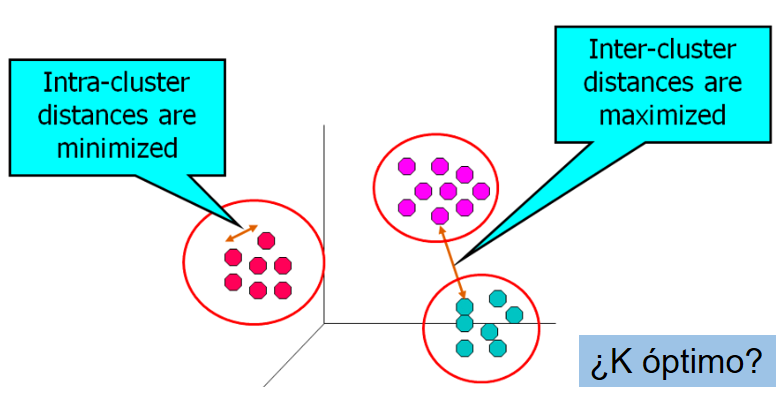

<div id="Importacion" style="color:#106ba3"><h3>Importación de librerías</h3> </div>

In [112]:
import pandas as pd  
import numpy as np  
 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import copy
import random

from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("Módulos y clases importados")

Módulos y clases importados


In [113]:
import warnings
# Ignorar todas las advertencias
warnings.filterwarnings('ignore')
#warnings.filterwarnings('ignore', category=DeprecationWarning)

<div id="Carga-descripcion" style="color:#106ba3"><h3>Carga y descripción del dataset</h3> </div>

**Nombre del dataset:** Dataset sintético para diseño de sistemas de recomendación basados en filtrado colaborativo [4].

**Descripción general:** Este conjunto de datos describe las preferencias (votos) de los usuarios (clientes) acerca de los ítems. Los votos están en una escala de 1 a 5. Siendo un 5 el valor más alto que indica que un ítem le gusta mucho a un cliente y 1 el valor más bajo que indica que no le gusta el ítem al cliente. Un valor de 0 indica la ausencia de voto. En un sistema de recomendación basado en filtrado colaborativo los ceros o falta de información es un problema clásico de dispersión (sparse). En otra práctica veremos cómo tratar este problema.

**Número de Variables (atributos o ítems en este caso):** 15

**Número de instancias (clientes):** 11

Con PCA intentaremos reducir de 15 variables (ítems) a una cantidad menor de nuevas variables (componentes principales) que representen aproximadamente la misma cantidad de información (varianza) del conjunto original. Esta estructura reducida se denomina un modelo puesto que representa el conjunto de datos original.

Este dataset sintético denominado **datatoy** lo puedes descargar <a href="https://genscinet.com/wp-content/uploads/2023/10/datatoy.csv" target="blank">aquí.</a> Debes copiarlo en el directorio de tu script.

In [114]:
dataset = "datatoy.csv"
dataframe = pd.read_csv(dataset)
numClientes=dataframe.shape[0]
dataframe.head(numClientes)
#matriz sparse: dispersa

,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12,i13,i14,i15
0,5,5,5,5,5,0,1,0,0,0,1,0,0,0,0
1,5,5,5,5,5,0,0,1,0,0,0,0,0,0,0
2,5,5,0,5,5,0,0,0,0,0,0,3,0,0,0
3,0,0,1,0,0,5,5,5,5,5,0,1,0,2,0
4,0,3,0,0,2,5,5,0,5,5,0,2,0,4,0
5,0,1,0,0,0,5,5,5,5,5,0,0,0,0,0
6,0,0,0,4,0,0,0,0,1,0,5,4,5,5,5
7,0,1,0,0,0,0,4,0,0,0,5,5,5,4,5
8,0,0,0,0,0,3,0,0,3,0,5,4,5,5,5
9,5,5,5,5,5,1,5,2,1,5,0,0,0,0,0


<div id="MedidasDescriptivas" style="color:#106ba3"><h3>Medidas Descriptivas</h3> </div>

In [115]:
dataframe.describe()

,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12,i13,i14,i15
count,11.000000,11.000000,11.000000,11.000000,11.00000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.818182,2.363636,1.454545,2.181818,2.00000,2.181818,2.727273,1.636364,2.272727,2.272727,1.454545,1.727273,1.818182,1.818182,1.363636
std,2.522625,2.248232,2.296242,2.522625,2.44949,2.400757,2.453198,2.248232,2.327699,2.611165,2.296242,1.954017,2.522625,2.227922,2.335497
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,5.000000,3.000000,5.000000,5.00000,5.000000,5.000000,3.500000,5.000000,5.000000,3.000000,3.500000,5.000000,4.000000,2.500000
max,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [116]:
# Calcular la media excluyendo los ceros
media_sin_ceros = dataframe[dataframe != 0].mean()
print("Media por item: ")
print(media_sin_ceros)

# Calcular la media global
media_global_sin_ceros = dataframe[dataframe != 0].mean().mean()
print("Media global: ",media_global_sin_ceros)

Media por item: 
i1     5.000000
i2     3.250000
i3     4.000000
i4     4.800000
i5     4.400000
i6     4.000000
i7     4.285714
i8     3.600000
i9     3.571429
i10    5.000000
i11    4.000000
i12    3.166667
i13    5.000000
i14    4.000000
i15    5.000000
dtype: float64
Media global:  4.204920634920635


<div id="Preparacion" style="color:#106ba3"><h3>Preparación de datos con Pipelines: preprocesamiento con transformación de variables numéricas</h3> </div>

Por medio de un Pipeline creamos un estimador compuesto. Esta herramienta nos permite combinar preprocesadores y transformadores para llevar un orden y estructura en el proceso de transformación de variables. 

In [117]:
#Aquí podemos aplicar el preprocesor de preferencia

dataframePreprocesado=copy.deepcopy(dataframe)
#cantidadTotalVariablesConPreprocesado=dataframePreprocesado.shape[1]

# Crea el Pipeline con estandarización, reducción y clasificación
steps = [
    ('normalizacion', MinMaxScaler(feature_range=(0, 1)))
    #('estandarizacion', StandardScaler(with_mean=True,with_std=True)) 
    #('simpleimputer', SimpleImputer(missing_values=0, strategy='mean'))#np.nan
]
pipeline = Pipeline(steps)

X_Preprocesado = pipeline.fit_transform(dataframePreprocesado)

n_samples = numClientes#cantidad de instancias
print('cantidad de clientes: ',n_samples)
n_features = X_Preprocesado.shape[1]#cantidad de variables. num_components debe ser entre 1 y min(n_samples, n_features)
print('cantidad de variables: ',n_features)
print('Pipeline aplicado')

cantidad de clientes:  11
cantidad de variables:  15
Pipeline aplicado


In [118]:
numVariables = X_Preprocesado.shape[1]
numVariables = range(1,numVariables+1)
dataframeX_Preprocesado = pd.DataFrame(data = X_Preprocesado, columns = numVariables)
dataframeX_Preprocesado.head(numClientes) 

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,1.0,1.0,1.0,1.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0
3,0.0,0.0,0.2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.2,0.0,0.4,0.0
4,0.0,0.6,0.0,0.0,0.4,1.0,1.0,0.0,1.0,1.0,0.0,0.4,0.0,0.8,0.0
5,0.0,0.2,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.2,0.0,1.0,0.8,1.0,1.0,1.0
7,0.0,0.2,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,1.0,1.0,1.0,0.8,1.0
8,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.6,0.0,1.0,0.8,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,0.2,1.0,0.4,0.2,1.0,0.0,0.0,0.0,0.0,0.0


<div id="CreacionFunciones" style="color:#106ba3"><h3>Funciones de Reducción con PCA, Clustering y Visualización</h3> </div>

In [119]:
def reducirConPCA(X,n_samples=2, n_features=2, numComponentsSeleccionados=0):
    if numComponentsSeleccionados==0:
        numComponentsSeleccionados=min(n_samples, n_features)
    print('cantidad de componentes seleccionados: ',numComponentsSeleccionados) 
    num_components=numComponentsSeleccionados
    #Si no se especifica el número de componentes en PCA el número de componentes es min(n_samples, n_features)
    pca = PCA(num_components)
    X_transformed = pca.fit_transform(X)#Se transforma y se obtiene la matriz de componentes principales
    #La varianza explicada dice cuánta información (varianza) se puede atribuir a cada uno de los componentes principales.
    #Esto es importante ya que, si bien se puede convertir un espacio de 4 dimensiones en un espacio de 2 dimensiones, se pierde
    #parte de la varianza (información).
    eigenvalues = pca.explained_variance_
    print('Varianzas:')
    print(eigenvalues.round(3))
    explained_variance_ratio_=pca.explained_variance_ratio_
    print('Varianza de cada dimensión con respecto a la varianza total:')
    print(explained_variance_ratio_.round(3))
    #Se obtiene la varianza acumulada
    print('Varianza acumulada:')
    explained_variance_ratio_cumsum=explained_variance_ratio_.cumsum()
    print(explained_variance_ratio_cumsum.round(3))
    num_pc= num_components
    a = range(1,num_pc+1)
    num_pc= a[::1]
    num_pc
    principalDf = pd.DataFrame(data = X_transformed, columns = num_pc)
    #Visualización de varianza por componente y varianza acumulada
    plt.plot(num_pc, explained_variance_ratio_, color='blue', linestyle='dashed', linewidth = 3, 
             marker='o', markerfacecolor='blue', markersize=5, label = 'varianza explicada')
    plt.plot(num_pc, explained_variance_ratio_cumsum, color='orange', linestyle='dashed', linewidth = 3, 
             marker='o', markerfacecolor='blue', markersize=5, label = 'varianza explicada acumulativa')
    plt.ylim((0,1.2))
    plt.title('Varianza con '+str(num_components)+' componentes principales')
    plt.xlabel('ID Componente Principal')
    plt.ylabel('Varianza')
    plt.legend(loc="upper right")
    plt.show()
    return principalDf

#Kmeans Clustering 
def doKmeans(X, ncluster=2, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full'):
    model = KMeans(ncluster)
    model.fit(X)
    clust_labels = model.predict(X)#las pertenencias (idx)
    cent = model.cluster_centers_#centroides
    return (clust_labels, cent)

#Funciones para visualizar grupos obtenidos de Kmeans
def visualizar2D(principalDf,idx,tituloEjeX,tituloEjeY):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Datos para puntos en 2D
    scatter = ax.scatter(principalDf[1],principalDf[2],
                         c=idx['Cluster'],s=50)
    ax.set_title('K-Means Clustering')
    ax.set_xlabel(tituloEjeX)
    ax.set_ylabel(tituloEjeY)
    plt.colorbar(scatter)
    
def visualizar2DconTitulosCluster(principalDf,idx,tituloEjeX,tituloEjeY):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # id de grupos
    cantidadClusters=idx['Cluster'].nunique()
    print('Cantidad de clusters: ',cantidadClusters)
    targets=list(range(cantidadClusters))
    colors= list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(cantidadClusters)))
    #targets = [0, 1, 2]
    #colors=['blue','green','red']
    for target, color in zip(targets, colors):
        # se relaciona el id del grupo con un color
        indicesToKeep = idx['Cluster'] == target
        # se relaciona los datos con el id del grupo y color 
        ax.scatter(principalDf.loc[indicesToKeep, 1]
                   , principalDf.loc[indicesToKeep, 2]
                   , c=color
                   , s=50)
    ax.legend(targets)
    ax.set_title('K-Means Clustering')
    ax.set_xlabel(tituloEjeX)
    ax.set_ylabel(tituloEjeY)
    
def visualizar3D(principalDf,idx,tituloEjeX,tituloEjeY,tituloEjeZ):
    fig = plt.figure(figsize=(8, 6), dpi=80)
    ax = plt.axes(projection='3d')
    # id de grupos
    cantidadClusters=idx['Cluster'].nunique()
    print('Cantidad de clusters: ',cantidadClusters)
    targets=list(range(cantidadClusters))
    colors= list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(cantidadClusters)))
    #5 colors # ejemplo:  ['#8af5da', '#fbc08c', '#b741d0', '#e599f1', '#bbcb59', '#a2a6c0']
    #targets = [0, 1, 2]
    #colors=['blue','green','red']
    for target, color in zip(targets, colors):
        # se relaciona el id del grupo con un color
        indicesToKeep = idx['Cluster'] == target
        # se relaciona los datos con el id del grupo y color 
        ax.scatter3D(principalDf.loc[indicesToKeep, 1]
                   , principalDf.loc[indicesToKeep, 2]
                   , principalDf.loc[indicesToKeep, 3]
                   , c=color
                   , s=50)
    ax.legend(targets)
    ax.set_title('K-Means Clustering')
    ax.set_xlabel(tituloEjeX)
    ax.set_ylabel(tituloEjeY)
    ax.set_zlabel(tituloEjeZ)

<div id="Metodo1" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Método 1: Clustering sin reducción de dimensionalidad</h2> </div>

Este método sigue los siguientes pasos:

- Preprocesamiento
    
- Clustering con todas las variables: sin reducir dimensionalidad

In [120]:
clust_labels, cent = doKmeans(dataframeX_Preprocesado, ncluster=3)
idx = pd.DataFrame(clust_labels)
idx=idx.rename(columns = {0: 'idCluster'}, inplace = False)
idx

,idCluster
0,0
1,0
2,0
3,1
4,1
5,1
6,2
7,2
8,2
9,0


<div id="Metodo2" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Método 2: Reducción de dimensionalidad con todos los componentes posibles y clustering</h2> </div>

Este método sigue los siguientes pasos:
- Preprocesamiento
- Reducción de dimensionalidad sin especificar un número de componentes principales: recuerda que si no se especifica el número de componentes en PCA, el número de componentes es min(n_samples, n_features)
- Clustering

cantidad de componentes seleccionados:  11
Varianzas:
[1.58  1.278 0.162 0.131 0.084 0.054 0.048 0.013 0.008 0.002 0.   ]
Varianza de cada dimensión con respecto a la varianza total:
[0.47  0.38  0.048 0.039 0.025 0.016 0.014 0.004 0.002 0.001 0.   ]
Varianza acumulada:
[0.47  0.851 0.899 0.938 0.963 0.979 0.993 0.997 0.999 1.    1.   ]


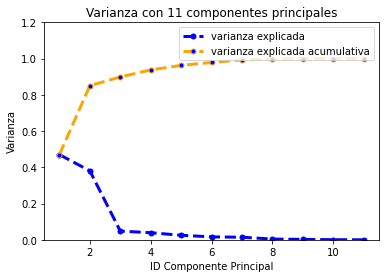

,1,2,3,4,5,6,7,8,9,10,11
0,1.735786,0.123725,-0.103760,0.009810,-0.232152,0.059203,-0.197199,-0.104071,0.075562,0.089727,1.249376e-16
1,1.771042,0.052265,-0.182795,-0.200948,-0.255543,0.026629,-0.156762,-0.066761,-0.086883,-0.089050,1.249376e-16
2,1.436970,0.353618,0.380429,-0.520397,0.561241,-0.059689,0.098729,0.086137,-0.020616,0.014300,1.249376e-16
3,-1.009071,-1.170223,-0.009088,-0.081984,-0.199274,-0.368611,-0.022603,0.042537,-0.160645,0.042870,1.249376e-16
4,-0.687117,-0.757526,0.986557,0.217250,-0.092104,0.211186,0.051868,-0.110186,-0.000772,-0.012769,1.249376e-16
5,-0.893697,-1.329529,-0.121106,-0.232712,0.047715,-0.269772,-0.098700,-0.003844,0.187188,-0.036762,1.249376e-16
6,-0.563084,1.739794,-0.184764,-0.060231,-0.133763,-0.155646,0.454048,-0.129747,0.021016,-0.002209,1.249376e-16
7,-0.856450,1.468173,-0.078930,0.545619,0.394514,-0.117819,-0.328000,-0.043192,-0.026483,-0.009214,1.249376e-16
8,-1.121008,1.397647,0.089208,-0.230429,-0.341657,0.217156,-0.112591,0.222766,0.029350,0.001158,1.249376e-16
9,1.312366,-0.826558,-0.175247,0.715301,-0.004314,0.015448,0.246732,0.163360,0.024243,-0.009268,1.249376e-16


In [121]:
componentesPrincipales = reducirConPCA(X=X_Preprocesado, n_samples=n_samples, n_features=n_features)
componentesPrincipales.head(numClientes)

In [122]:
clust_labels, cent = doKmeans(componentesPrincipales, ncluster=3)
idx = pd.DataFrame(clust_labels)
idx=idx.rename(columns = {0: 'Cluster'}, inplace = False)
idx

,Cluster
0,1
1,1
2,1
3,0
4,0
5,0
6,2
7,2
8,2
9,1


**Correlaciones aproximadas a cero entre la mayoría de componentes principales**

In [123]:
correl=componentesPrincipales.corr()
correl=round(correl,3)
correl

,1,2,3,4,5,6,7,8,9,10,11
1,1.000,0.0,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.126
2,0.000,1.0,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.100
3,-0.000,0.0,1.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.066
4,0.000,-0.0,0.000,1.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.024
5,-0.000,0.0,-0.000,0.000,1.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.105
6,0.000,0.0,-0.000,-0.000,0.000,1.000,-0.000,0.000,-0.000,0.000,0.114
7,-0.000,0.0,-0.000,0.000,-0.000,-0.000,1.000,-0.000,0.000,0.000,-0.271
8,-0.000,0.0,-0.000,-0.000,-0.000,0.000,-0.000,1.000,0.000,-0.000,-0.005
9,-0.000,-0.0,0.000,-0.000,-0.000,-0.000,0.000,0.000,1.000,0.000,0.043
10,0.000,0.0,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,1.000,-0.919


<div id="Metodo3" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Método 3: Reducción de dimensionalidad con 2 componentes principales, clustering y visualización de grupos en 2D</h2> </div>

Este método sigue los siguientes pasos:
- Preprocesamiento
- Reducción de dimensionalidad con dos componentes principales
- Clustering
- Visualización en 2D

cantidad de componentes seleccionados:  2
Varianzas:
[1.58  1.278]
Varianza de cada dimensión con respecto a la varianza total:
[0.47 0.38]
Varianza acumulada:
[0.47  0.851]


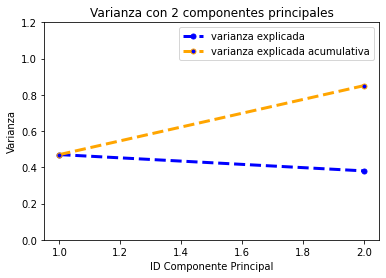

,1,2
0,1.735786,0.123725
1,1.771042,0.052265
2,1.436970,0.353618
3,-1.009071,-1.170223
4,-0.687117,-0.757526
5,-0.893697,-1.329529
6,-0.563084,1.739794
7,-0.856450,1.468173
8,-1.121008,1.397647
9,1.312366,-0.826558


In [124]:
componentesPrincipales = reducirConPCA(X=X_Preprocesado,n_samples=n_samples, n_features=n_features, numComponentsSeleccionados=2)
componentesPrincipales.head(numClientes)

In [125]:
clust_labels, cent = doKmeans(componentesPrincipales, ncluster=3)
idx = pd.DataFrame(clust_labels)
idx=idx.rename(columns = {0: 'Cluster'}, inplace = False)
idx

,Cluster
0,1
1,1
2,1
3,2
4,2
5,2
6,0
7,0
8,0
9,1


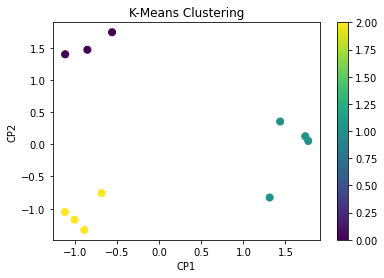

In [126]:
visualizar2D(componentesPrincipales,idx,'CP1', 'CP2')

Cantidad de clusters:  3


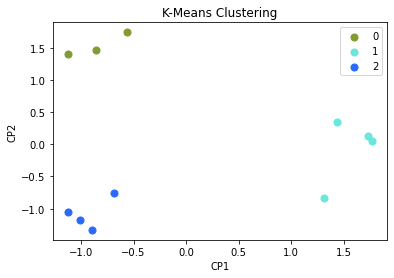

In [130]:
visualizar2DconTitulosCluster(componentesPrincipales,idx,'CP1', 'CP2')

<div id="Metodo4" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Método 4: Reducción de dimensionalidad con 3 componentes principales, clustering y visualización de grupos en 3D</h2> </div>

Este método sigue los siguientes pasos:

- Preprocesamiento
- Reducción de dimensionalidad con tres componentes principales
- Clustering
- Visualización en 3D

cantidad de componentes seleccionados:  3
Varianzas:
[1.58  1.278 0.162]
Varianza de cada dimensión con respecto a la varianza total:
[0.47  0.38  0.048]
Varianza acumulada:
[0.47  0.851 0.899]


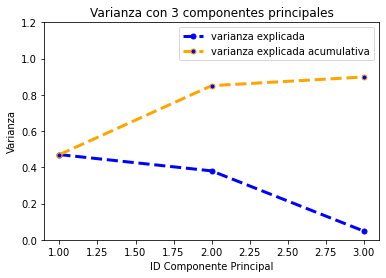

,1,2,3
0,1.735786,0.123725,-0.103760
1,1.771042,0.052265,-0.182795
2,1.436970,0.353618,0.380429
3,-1.009071,-1.170223,-0.009088
4,-0.687117,-0.757526,0.986557
5,-0.893697,-1.329529,-0.121106
6,-0.563084,1.739794,-0.184764
7,-0.856450,1.468173,-0.078930
8,-1.121008,1.397647,0.089208
9,1.312366,-0.826558,-0.175247


In [131]:
componentesPrincipales = reducirConPCA(X=X_Preprocesado,n_samples=n_samples, n_features=n_features, numComponentsSeleccionados=3)
componentesPrincipales.head(numClientes)

In [132]:
#Clustering: 3 grupos
clust_labels, cent = doKmeans(componentesPrincipales, ncluster=3)
idx = pd.DataFrame(clust_labels)
idx=idx.rename(columns = {0: 'Cluster'}, inplace = False)
idx

,Cluster
0,0
1,0
2,0
3,1
4,1
5,1
6,2
7,2
8,2
9,0


Cantidad de clusters:  3


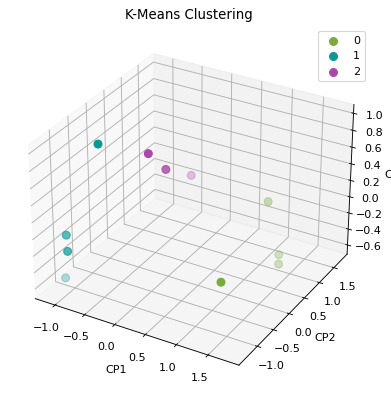

In [135]:
visualizar3D(componentesPrincipales,idx,'CP1', 'CP2', 'CP3')

In [136]:
#Clustering: 5 grupos 
clust_labels, cent = doKmeans(componentesPrincipales, ncluster=5)
idx = pd.DataFrame(clust_labels)
idx=idx.rename(columns = {0: 'Cluster'}, inplace = False)
idx

,Cluster
0,1
1,1
2,1
3,3
4,0
5,3
6,2
7,2
8,2
9,4


Cantidad de clusters:  5


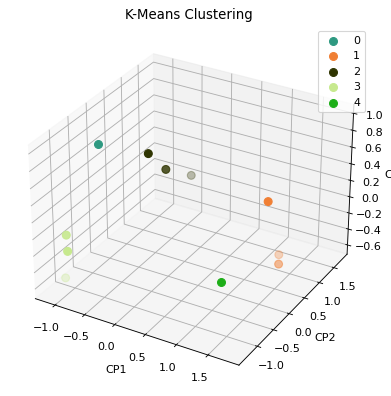

In [137]:
visualizar3D(componentesPrincipales,idx,'CP1', 'CP2', 'CP3')

<div id="koptimo" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Determinación del K óptimo en Kmeans</h2> </div>

Una vez que se ha determinado la cantidad adecuada de dimensiones con PCA, se procede a realizar el clustering. 

**Método Elbow (Codo):** el nombre "codo" proviene de la forma del gráfico resultante cuando se representan los valores de la función de costo en función del número de clusters. El punto en el gráfico donde se observa una curva o "codo" es considerado como un indicador del número óptimo de clusters.

**Distancia intra-cluster:** calcula la suma de las distancias al cuadrado entre los puntos de datos y los centroides de los clusters para cada valor de K. Se intenta alcanzar un equilibrio entre la reducción de la varianza intra-cluster y la minimización del número de clusters.

Es importante recordar que el método del codo es una heurística y no siempre proporciona una respuesta definitiva. En algunos casos, es posible que no haya un codo claro en el gráfico, lo que hace que la elección del número óptimo de clusters sea más ambigua. En tales casos, se pueden utilizar otras métricas y técnicas para validar la elección del número de clusters. Un ejemplo se presenta en [3].

In [144]:
#Metodo Elbow
from scipy.spatial.distance import cdist

# Conjunto de datos con menor dimensión
X=componentesPrincipales
# Conjunto de datos original
#X=dataframeX_Preprocesado

maxNumeroCentroides=X.shape[0] # la cantidad de observaciones, en este caso de usuarios. Cada usuario podría ser un grupo.
print('Máximo número de centroides: ',maxNumeroCentroides)

#Aquí puedes indicar la cantidad de grupos. No se puede tener más grupos que observaciones. No existen grupos vacíos. 
K=maxNumeroCentroides

K_range=range(2,K+1,1)
distortions=[]

for i in K_range:
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0])
print('Kmeans terminado')

Máximo número de centroides:  11
Kmeans terminado


Text(0.5, 1.0, 'Seleccionando K con el método Elbow')

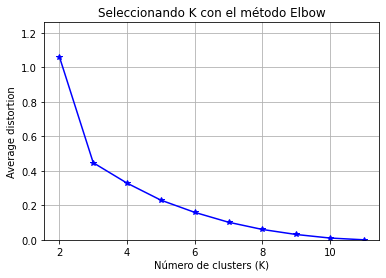

In [149]:
#Con 10 componentes
fig1=plt.figure()
ex = fig1.add_subplot(111)
ex.plot(K_range, distortions, 'b*-')
plt.grid(True)
maximo=max(distortions)+0.2
plt.ylim([0,maximo])
plt.xlabel('Número de clusters (K)')
plt.ylabel('Average distortion')
plt.title('Seleccionando K con el método Elbow')

<p style="background-color: #0074E4; color: white; padding: 10px; font-size: 18px;">
        En la figura se puede apreciar que el valor óptimo según el método Elbow es 3
</p>

In [155]:
#Clustering con Kmeans++
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans

# Conjunto de datos con menor dimensión
X=componentesPrincipales
# Conjunto de datos original
#X=dataframeX_Preprocesado

maxNumeroCentroides=X.shape[0] # la cantidad de observaciones, en este caso de usuarios. Cada usuario podría ser un grupo.
print('Máximo número de centroides: ',maxNumeroCentroides)

#Aquí puedes indicar la cantidad de grupos. No se puede tener más grupos que observaciones. No existen grupos vacíos. 
K=5

def doKmeans(X, nclust=2, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full'):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(X, K, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full')
#kmeans = pd.DataFrame(clust_labels)
kmeans = pd.DataFrame(clust_labels,columns=['Grupos'])
#kmeans
print('Usuarios agrupados')

Máximo número de centroides:  11
Usuarios agrupados


In [156]:
# Se calcula la cantidad de elementos por grupo y luego se ordenan estas cantidades de mayor a menor
kmeans
UserGrupoK=kmeans.groupby(kmeans.Grupos).Grupos.count()

UserGrupoK=UserGrupoK.sort_values(ascending=False, inplace=False, kind='quicksort')
#UserGrupoK.sort_values(by='values', axis=1, ascending=False, inplace=False, kind='quicksort')
UserGrupoK

Grupos
0    3
1    3
2    3
3    1
4    1
Name: Grupos, dtype: int64

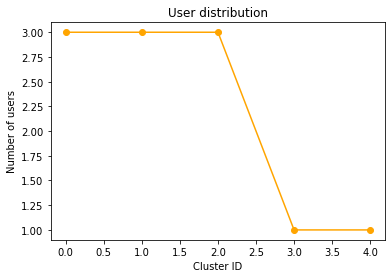

In [157]:
grupo=UserGrupoK.index.tolist()
valores=UserGrupoK.values.tolist()

plt.rcParams.update({'font.size': 10})
#plt.bar(range(len(grupo)), valores, color='red')
plt.plot(range(len(grupo)), valores, color='orange', marker='o')
#plt.figure(figsize=(8,3))
##Pone el valor de los indices en el eje x
#plt.xticks(range(len(grupo)), grupo, rotation='vertical')
plt.title("Distribución de usuarios")
plt.xlabel("Cluster ID")
plt.ylabel("Cantidad de usuarios")
plt.show()

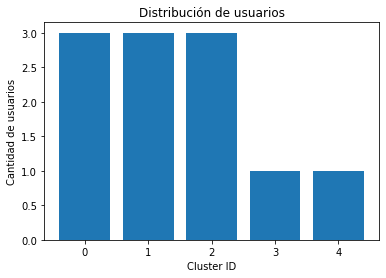

In [159]:
# Crear un histograma

grupo=UserGrupoK.index.tolist()
valores=UserGrupoK.values.tolist()

plt.bar(grupo, valores)

# Etiquetas y título
plt.title("Distribución de usuarios")
plt.xlabel("Cluster ID")
plt.ylabel("Cantidad de usuarios")

# Mostrar el histograma
plt.show()

<div id="Conclusiones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Conclusiones</h2> </div>

Hemos aprendido a aplicar una técnica de reducción de dimensionalidad como paso previo a un problema de clustering. Además, hemos aprendido a visualizar grupos de elementos mediante PCA con 2 y 3 componentes.

- Con 11 componentes principales hemos obtenido el 100% de la varianza (varianza acumulada igual a 1)
- Con 2 componentes principales hemos obtenido el 85.1% de la varianza (varianza acumulada igual a 0.851)
- Con 3 componentes principales hemos obtenido el 89.9% de la varianza (varianza acumulada igual a 0.899)

En todos los métodos, los usuarios han sido agrupados de la misma manera: 
- grupo {u0,u1,u2,u9}
- grupo {u3,u4,u5,u10}
- grupo {u6,u7,u8}

Esta agrupación similar nos demuestra que la reducción de dimensionalidad con PCA ha permitido generar un modelo de menor dimensionalidad y mantener la información (varianza) necesaria para realizar posteriormente la tarea de clustering. 

<div id="Referencias" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Referencias</h2> </div>

[1] Bishop, C. M. (2006). Pattern recognition and machine learning. springer.

[2] P. Joshi. (2017). Artificial intelligence with python. Packt Publishing Ltd.

[3] Hurtado, R., Bobadilla, J., Bojorque, R., Ortega, F., & Li, X. (2018). A new recommendation approach based on probabilistic soft clustering methods: A scientific documentation case study. IEEE Access, 7, 7522-7534.

[4] Bobadilla, J., Bojorque, R., Esteban, A. H., & Hurtado, R. (2017). Recommender systems clustering using Bayesian non negative matrix factorization. IEEE Access, 6, 3549-3564.

**Enlaces de documentación de scikit-learn:**

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html